In [28]:
termdir = "clir_evaluated/term"
fourgramdir = "clir_evaluated/4gram"
fivegramdir = "clir_evaluated/5gram"
# alldirs = [termdir, fourgramdir, fivegramdir]
alldirs = [termdir]
whichdir = "term"
update_experiment_name = {
	"hi2en_emb": "embeddings +[oov transliteration]",
	"en_base": "monolingual base",
	"hi2en_emb_no_oov": "embeddings",
	"hi2en_gt": "mt",
	"hi2en_emb_synset": "embeddings +[oov transliteration, synset]",
}

In [29]:
import subprocess
import os
import re
import pandas as pd
data = []
for adir in alldirs:
    for root, dirs, files in os.walk(adir):
        for file in files:
            if file.endswith(".txt"):
                path = os.path.join(root, file)
                print(f"Evaluating {path}")
                feature_type = re.sub("clir_evaluated/", "", root)
                experiment = re.sub(f"trec_{feature_type}_rankedlist_", "", os.path.splitext(file)[0])
                input_type = experiment.split("_")[-1]
                experiment = re.sub(f"_{input_type}", "", experiment)
                maprec = None
                P_5 = -1
                P_10 = -1
                P_15 = -1
                P_20 = -1
                P_30 = -1
                P_100 = -1
                P_200 = -1
                P_500 = -1
                P_1000 = -1
                
                with open(path) as file:
                    lines = file.readlines()
                    for line in lines:
                        row = line.split()
                        if row[0] == "iprec_at_recall_0.00":
                            par0_0 = row[2]
                        if row[0] == "iprec_at_recall_0.10":
                             par0_1 = row[2]
                        if row[0] == "iprec_at_recall_0.20":
                            par0_2 = row[2]
                        if row[0] == "iprec_at_recall_0.30":
                            par0_3 = row[2]
                        if row[0] == "iprec_at_recall_0.40":
                            par0_4 = row[2]
                        if row[0] == "iprec_at_recall_0.50":
                            par0_5 = row[2]
                        if row[0] == "iprec_at_recall_0.60":
                            par0_6 = row[2]
                        if row[0] == "iprec_at_recall_0.70":
                            par0_7 = row[2]
                        if row[0] == "iprec_at_recall_0.80":
                            par0_8 = row[2]
                        if row[0] == "iprec_at_recall_0.90":
                            par0_9 = row[2]
                        if row[0] == "iprec_at_recall_1.00":
                            par1_0 = row[2]
                    item = {
                        "feature_type": feature_type,
                        "input_type": input_type,
                        "experiment": update_experiment_name[experiment],
                        0.0: float(par0_0),
                        0.1: float(par0_1),
                        0.2: float(par0_2),
                        0.3: float(par0_3),
                        0.4: float(par0_4),
                        0.5: float(par0_5),
                        0.6: float(par0_6),
                        0.7: float(par0_7),
                        0.8: float(par0_8),
                        0.9: float(par0_9),
                        1.0: float(par1_0),
                    }
                    data.append(item)

Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_synset_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_en_base_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_no_oov_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_gt_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_en_base_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_no_oov_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_questions.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_gt_keywords.txt
Evaluating clir_evaluated/term/trec_term_rankedlist_hi2en_emb_synset_keywords.txt


In [30]:
df = pd.DataFrame(data)
df

,feature_type,input_type,experiment,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,term,keywords,embeddings +[oov transliteration],0.3918,0.1455,0.0319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,term,questions,"embeddings +[oov transliteration, synset]",0.3084,0.0655,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,term,keywords,monolingual base,0.6587,0.2173,0.0533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,term,questions,embeddings,0.3136,0.0505,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,term,questions,mt,0.5846,0.1359,0.0455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,term,questions,monolingual base,0.7642,0.2023,0.0452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,term,keywords,embeddings,0.3713,0.1296,0.0319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,term,questions,embeddings +[oov transliteration],0.3039,0.0655,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,term,keywords,mt,0.5277,0.1488,0.0455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,term,keywords,"embeddings +[oov transliteration, synset]",0.3297,0.1114,0.0314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Keywords

In [31]:
kdf =  df[df["input_type"] == "keywords"]
kdf = kdf.drop("input_type", 1)
kdf.sort_values(by=["experiment"], ascending=True, inplace=True)
kdf.reset_index(drop=True, inplace=True)
kdf = kdf.drop("feature_type", 1)
kdf

/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_3978/1194595469.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  kdf = kdf.drop("input_type", 1)
/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_3978/1194595469.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  kdf = kdf.drop("feature_type", 1)


,experiment,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,embeddings,0.3713,0.1296,0.0319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"embeddings +[oov transliteration, synset]",0.3297,0.1114,0.0314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,embeddings +[oov transliteration],0.3918,0.1455,0.0319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,monolingual base,0.6587,0.2173,0.0533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mt,0.5277,0.1488,0.0455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
pdf = kdf.transpose()
pdf.rename(columns={0: "embeddings", 1: "embeddings + mt +[oov transliteration]",
                   2:"embeddings + mt +[synset, oov transliteration]", 3: "embeddings +[oov transliteration, synset]",
                   4:"embeddings +[oov transliteration]", 5: "monolingual base",
                   6:"mt", 7:"mt +[synset]"}, inplace=True)
pdf = pdf[1:]
pdf

,embeddings,embeddings + mt +[oov transliteration],"embeddings + mt +[synset, oov transliteration]","embeddings +[oov transliteration, synset]",embeddings +[oov transliteration]
0.0,0.3713,0.3297,0.3918,0.6587,0.5277
0.1,0.1296,0.1114,0.1455,0.2173,0.1488
0.2,0.0319,0.0314,0.0319,0.0533,0.0455
0.3,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0
0.6,0.0,0.0,0.0,0.0,0.0
0.7,0.0,0.0,0.0,0.0,0.0
0.8,0.0,0.0,0.0,0.0,0.0
0.9,0.0,0.0,0.0,0.0,0.0


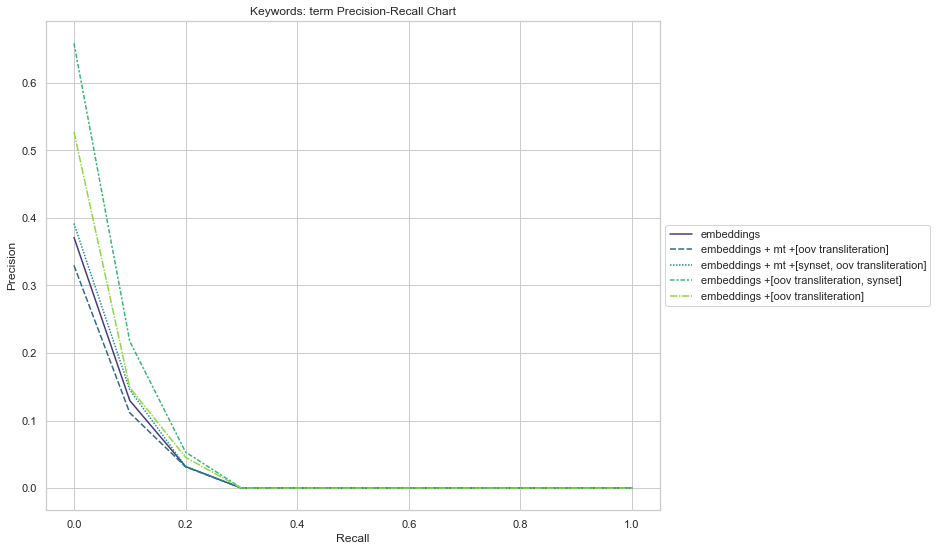

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(11, 9))
sns.set_theme(style="whitegrid")  
sns.lineplot(data=pdf, palette="viridis") 
handles, labels = plt.gca().get_legend_handles_labels()
ordered_labels = ["base", "google translate", "google translate +[synset]","embeddings", 
                  "embeddings +[oov transliteration]", "embeddings +[oov transliteration, synset]"]
plt.legend(
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Recall")
plt.ylabel("Precision")
# title
title = f'Keywords: {whichdir} Precision-Recall Chart'
plt.title(title, loc="center", fontsize=12)
plt.show()


# Questions

In [34]:
qdf =  df[df["input_type"] == "questions"]
qdf = qdf.drop("input_type", 1)
qdf.sort_values(by=["experiment"], ascending=True, inplace=True)
qdf.reset_index(drop=True, inplace=True)
qdf = qdf.drop("feature_type", 1)
qdf

/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_3978/1286675100.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qdf = qdf.drop("input_type", 1)
/var/folders/94/w8hsf0tx2sj4m56_ybvwlrtc0000gn/T/ipykernel_3978/1286675100.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  qdf = qdf.drop("feature_type", 1)


,experiment,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,embeddings,0.3136,0.0505,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"embeddings +[oov transliteration, synset]",0.3084,0.0655,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,embeddings +[oov transliteration],0.3039,0.0655,0.0186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,monolingual base,0.7642,0.2023,0.0452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mt,0.5846,0.1359,0.0455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
rdf = qdf.transpose()
rdf.rename(columns={0: "embeddings", 1: "embeddings + mt +[oov transliteration]",
                   2:"embeddings + mt +[synset, oov transliteration]", 3: "embeddings +[oov transliteration, synset]",
                   4:"embeddings +[oov transliteration]", 5: "monolingual base",
                   6:"mt", 7:"mt +[synset]"}, inplace=True)
rdf = rdf[1:]
rdf

,embeddings,embeddings + mt +[oov transliteration],"embeddings + mt +[synset, oov transliteration]","embeddings +[oov transliteration, synset]",embeddings +[oov transliteration]
0.0,0.3136,0.3084,0.3039,0.7642,0.5846
0.1,0.0505,0.0655,0.0655,0.2023,0.1359
0.2,0.0186,0.0186,0.0186,0.0452,0.0455
0.3,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0
0.6,0.0,0.0,0.0,0.0,0.0
0.7,0.0,0.0,0.0,0.0,0.0
0.8,0.0,0.0,0.0,0.0,0.0
0.9,0.0,0.0,0.0,0.0,0.0


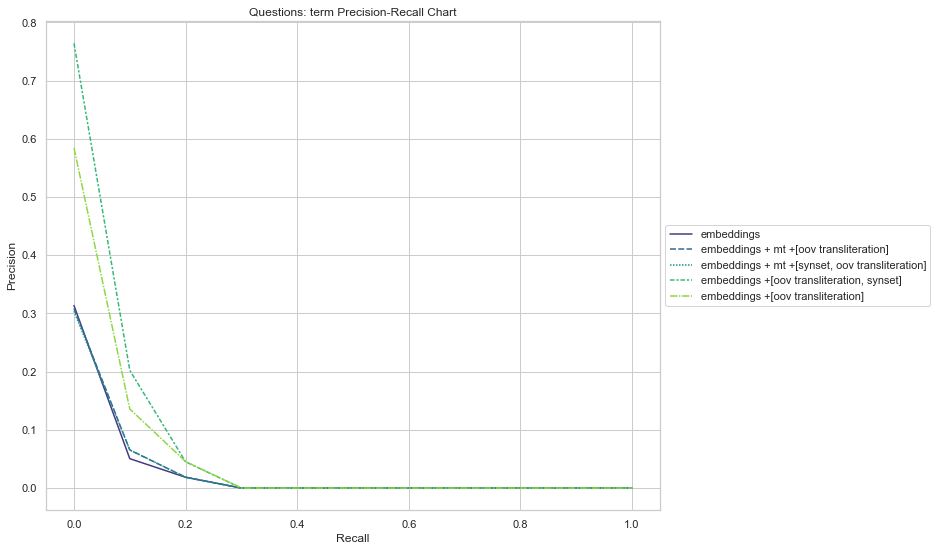

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(11, 9))
sns.set_theme(style="whitegrid")  
sns.lineplot(data=rdf, palette="viridis") 
handles, labels = plt.gca().get_legend_handles_labels()
ordered_labels = ["base", "google translate", "google translate +[synset]","embeddings", 
                  "embeddings +[oov transliteration]", "embeddings +[oov transliteration, synset]"]
plt.legend(
           loc="center left", 
           bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Recall")
plt.ylabel("Precision")

# title
title = f'Questions: {whichdir} Precision-Recall Chart'
plt.title(title, loc="center", fontsize=12)
plt.show()